In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
cats = train.select_dtypes(include=["object"])

In [14]:
cats.groupby("job").agg({"default": "count"})

,default
job,
admin.,81492
blue-collar,170498
entrepreneur,17718
housemaid,15912
management,175541
retired,35185
self-employed,19020
services,64209
student,11767


In [53]:
value = 1/cats[['job']].nunique()['job']

In [54]:
value

np.float64(0.08333333333333333)

In [51]:
vc = cats['job'].value_counts(normalize=True)

# names as a pandas Index
rare_names = vc.index[vc < newval]

# or equivalently
rare_names = vc[vc < newval].index

# if you want a plain Python list
rare_list = rare_names.tolist()


In [52]:
rare_list

['self-employed',
 'entrepreneur',
 'unemployed',
 'housemaid',
 'student',
 'unknown']

In [48]:
value = 1/cats[['job']].nunique()['job']

newval = value * 0.5

In [39]:
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False, categories=[['technician', 'blue-collar', 'fish']])
enc.set_output(transform="pandas")
enc.fit(cats[["job"]])
tf = enc.transform(cats[["job"]])

In [40]:
tf

,job_technician,job_blue-collar,job_fish
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
749995,0.0,0.0,0.0
749996,0.0,0.0,0.0
749997,0.0,1.0,0.0
749998,1.0,0.0,0.0


In [30]:
rare_list

['self-employed',
 'entrepreneur',
 'unemployed',
 'housemaid',
 'student',
 'unknown']

In [10]:
cats.loc[:,"job"].groupby(cats.loc[:,"job"]).count() / len(cats)

job
admin.           0.108656
blue-collar      0.227331
entrepreneur     0.023624
housemaid        0.021216
management       0.234055
retired          0.046913
self-employed    0.025360
services         0.085612
student          0.015689
technician       0.184143
unemployed       0.023512
unknown          0.003889
Name: job, dtype: float64

In [ ]:
cats[]

<Axes: xlabel='marital'>

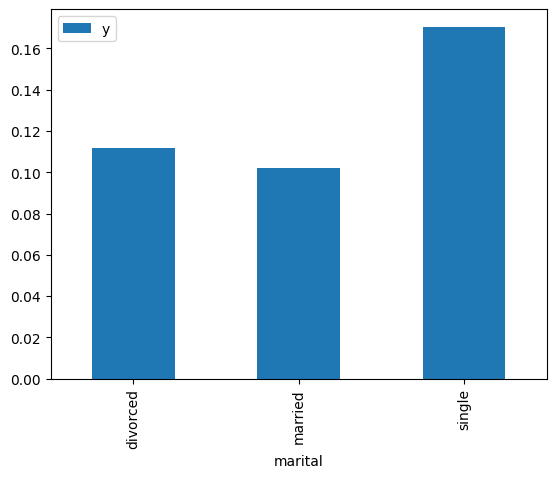

In [12]:
train.groupby(['marital']).agg({'y': 'mean'}).plot.bar()

<Axes: xlabel='job'>

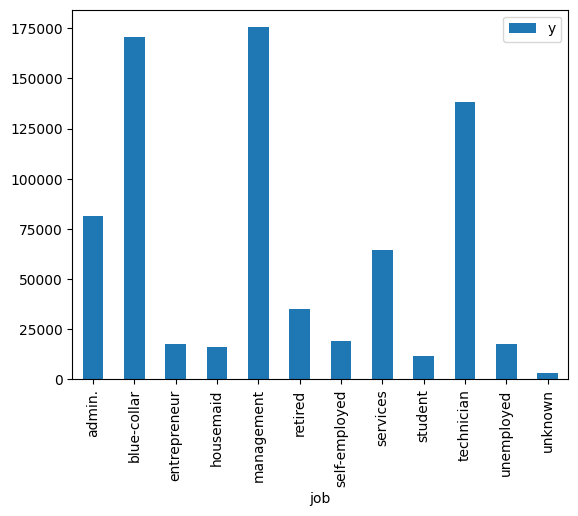

In [ ]:
train.groupby(['job']).agg({'y': 'mean'}).plot.bar()

<Axes: xlabel='job,housing'>

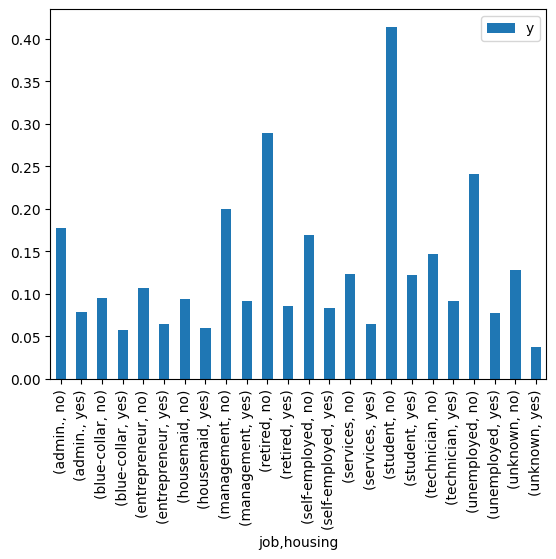

In [14]:
train.groupby(['job', 'housing']).agg({'y': 'mean'}).plot.bar()

<Axes: xlabel='job,housing'>

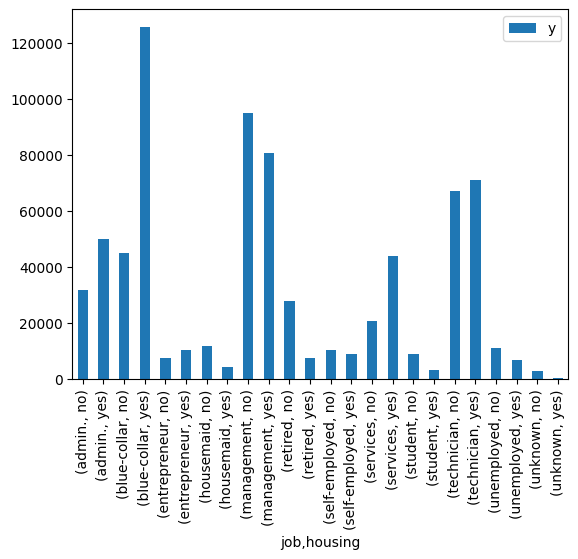

In [16]:
train.groupby(['job', 'housing']).agg({'y': 'count'}).plot.bar()

In [6]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


<Axes: xlabel='id', ylabel='balance'>

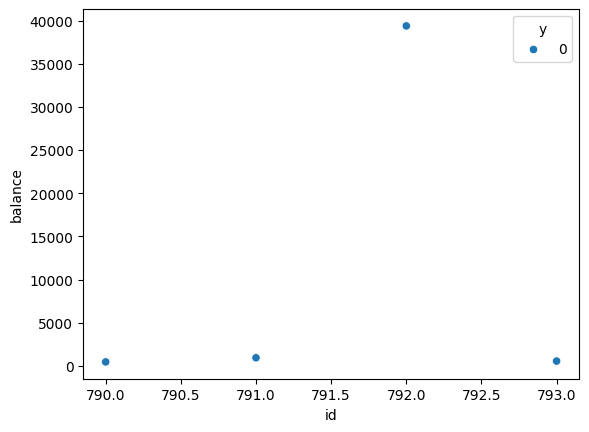

In [16]:
sns.scatterplot(data=train[790:794], x="id", y="balance" , hue="y")

In [17]:
train[train['id'] == 792]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
792,792,23,management,single,tertiary,no,39385,no,no,cellular,3,jun,124,1,-1,0,unknown,0


In [ ]:
from custom_transformers import TrainTestAwarePipeline

X_train = train.drop(columns=['y', 'id'])

pipeline = TrainTestAwarePipeline(...)
pipeline.fit(X_train, y_train)

X_train_transformed = pipeline.transform_train(X_train)  # Includes concatenation
X_test_transformed = pipeline.transform_test(X_test)     # No concatenation

In [18]:
from custom_transformers import TrainTestAwarePipeline

# 1. Create the pipeline
pipeline = TrainTestAwarePipeline(
    categorical_cols_for_ohe=['job', 'marital', 'education', 'housing'],
    feature_combinations=[("job", "marital"), ("education", "housing")],
    min_frequency_ohe=0.02,      # Categories below 2% become "rare"
    drop_target_encoded_cols=True,
    original_data_path="bank-full.csv"
)

# 2. Fit on training data
X_train = train.drop(columns=['y', 'id'])
y_train = train['y']
pipeline.fit(X_train, y_train)

# 3. Transform training data (includes bank-full.csv concatenation)
X_train_transformed = pipeline.transform_train(X_train)

# 4. Transform test data (NO concatenation)
X_test = test.drop(columns=['id'])
X_test_transformed = pipeline.transform_test(X_test)

In [22]:
from custom_transformers import TrainTestAwarePipeline
import pandas as pd

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Create pipeline and fit
pipeline = TrainTestAwarePipeline(
    categorical_cols_for_ohe=['job', 'marital', 'education', 'housing'],
    feature_combinations=[("job", "marital"), ("education", "housing")],
    min_frequency_ohe=0.02,
    drop_target_encoded_cols=True,
    original_data_path="bank-full.csv"
)

X_train = train.drop(columns=['y', 'id'])
y_train = train['y']

pipeline.fit(X_train, y_train)

# Transform the data
X_train_transformed = pipeline.transform_train(X_train)

# Create matching y_train that includes original data targets
original = pd.read_csv("bank-full.csv", sep=";")
original['y'] = original['y'].apply(lambda x: 1 if x=="yes" else 0)

# Concatenate targets to match the training data
y_train_full = pd.concat([y_train, original['y']], ignore_index=True)


In [23]:
xgb_args = {'max_depth': 19,
            'learning_rate': 0.06713653207413413,
            'n_estimators': 636,
            'subsample': 0.5601215682958539,
            'colsample_bytree': 0.4945498077523225,
            'lambda': 3.4532262397491,
            'alpha': 7.945588384011887,
            'gamma': 2.420721931747102,
            'min_child_weight': 3,
            'max_delta_step': 8,
            'scale_pos_weight': 1.5860211429131792,
            'base_score': 0.32509992019090567}

from xgboost import XGBClassifier

model = XGBClassifier(**xgb_args)

In [24]:
model.fit(X_train_transformed, y_train_full)

XGBClassifier(alpha=7.945588384011887, base_score=0.32509992019090567,
              booster=None, callbacks=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.4945498077523225,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=2.420721931747102, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=3.4532262397491,
              learning_rate=0.06713653207413413, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=8,
              max_depth=19, max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=636, ...)

In [25]:
probas = model.predict_proba(X_test_transformed)

In [ ]:
probas[]

array([[0.9979991 , 0.00200091],
       [0.83345103, 0.16654897],
       [0.9988201 , 0.00117989],
       ...,
       [0.23255628, 0.7674437 ],
       [0.99814963, 0.00185037],
       [0.8199186 , 0.18008144]], dtype=float32)

In [28]:
ret_df = pd.DataFrame({"id": test['id'], "y": probas[:, 1]})

In [30]:
ret_df.to_csv("xgb_newpipeline.csv", index=False)